Extracting EDF parameters from h:\quantumbci\quantum_bci\data\S108R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 529 samples (3.306 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.2s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Using matplotlib as 2D backend.


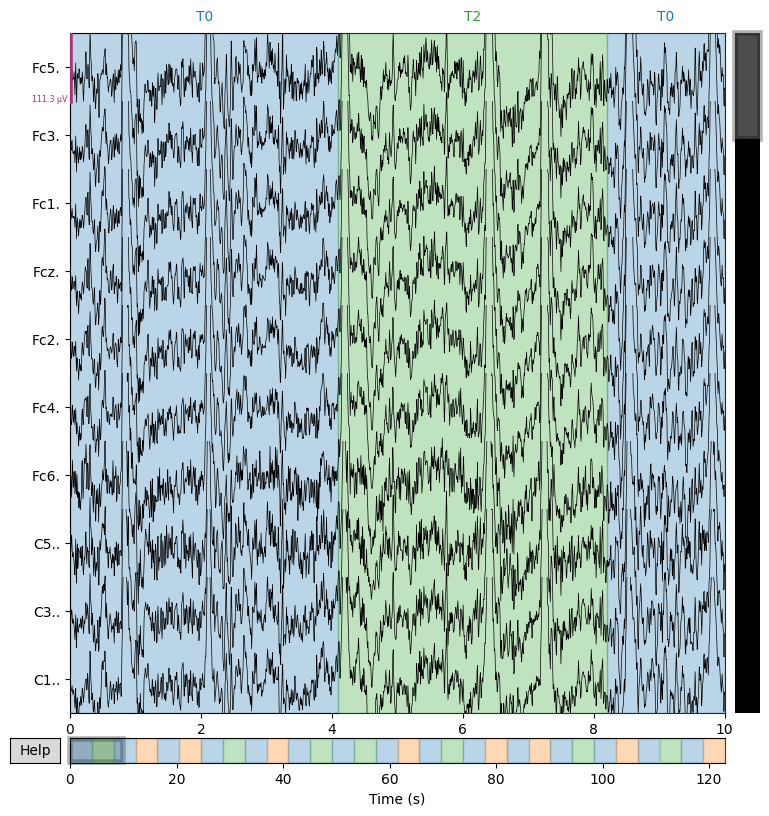

Total segments: 61
Labels: ['left', 'left', 'left', 'left', 'left']...


c:\Users\Mohammed nawaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Mohammed nawaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Mohammed nawaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\

Accuracy: 0.6154
Classification Report:
               precision    recall  f1-score   support

        left       0.00      0.00      0.00         5
       right       0.62      1.00      0.76         8

    accuracy                           0.62        13
   macro avg       0.31      0.50      0.38        13
weighted avg       0.38      0.62      0.47        13



c:\Users\Mohammed nawaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\autograd\tracer.py:16: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Epoch 1: Loss = 0.5000
Epoch 2: Loss = 0.5000
Epoch 3: Loss = 0.5000
Epoch 4: Loss = 0.5000
Epoch 5: Loss = 0.5000
Epoch 6: Loss = 0.5000
Epoch 7: Loss = 0.5000
Epoch 8: Loss = 0.5000
Epoch 9: Loss = 0.5000
Epoch 10: Loss = 0.5000
Epoch 11: Loss = 0.5000
Epoch 12: Loss = 0.5000
Epoch 13: Loss = 0.5000
Epoch 14: Loss = 0.5000
Epoch 15: Loss = 0.5000
Epoch 16: Loss = 0.5000
Epoch 17: Loss = 0.5000
Epoch 18: Loss = 0.5000
Epoch 19: Loss = 0.5000
Epoch 20: Loss = 0.5000


In [ ]:
# ------------------------------------------
# STEP 1: Import and Load EEG (.edf) File
# ------------------------------------------

import sys
sys.path.append("../src")  # Add 'src' folder to the import path

from preprocessing import load_and_preprocess_eeg  # Import preprocessing function

# Load and filter the EEG file
raw = load_and_preprocess_eeg("../data/S108R14.edf")


# ------------------------------------------
# STEP 2: Segment EEG into 2s Windows
# ------------------------------------------

from features import segment_signal, extract_band_power  # Import segmentation and feature functions

# Segment the EEG signal into 2-second windows
segments = segment_signal(raw, segment_duration=2.0)
print(f"Total segments: {len(segments)}")

# ------------------------------------------
# STEP 3: Extract Band Power Features
# ------------------------------------------

sfreq = raw.info['sfreq']
X_input = [extract_band_power(seg, sfreq) for seg in segments]

# ------------------------------------------
# STEP 4: Create Dummy Labels (e.g., Left / Right)
# ------------------------------------------

# Half as "left", rest as "right"
labels = ['left'] * (len(segments) // 2) + ['right'] * (len(segments) - len(segments) // 2)
print(f"Labels: {labels[:5]}...")

# ------------------------------------------
# STEP 5: Train Classical Model
# ------------------------------------------

from model_classical import train_classical_model

model_classical, le_classical = train_classical_model(X_input, labels)


from model_quantum import create_qnn_model

trained_weights, le_qnn = create_qnn_model(X_input, labels)
